In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.image import resize

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
# Preprocess the images
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [4]:
# Create a feature extraction model using VGG16
base_model = VGG16(weights='imagenet', include_top=False)
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

58889256/58889256 [==============================] - 2s 0us/step


In [5]:
# Extract features from the images
train_features = feature_extractor.predict(train_images)
test_features = feature_extractor.predict(test_images)

# Reshape the features
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

# Create a Nearest Neighbors model
n_neighbors = 5
nn_model = NearestNeighbors(n_neighbors=n_neighbors)
nn_model.fit(train_features_flat)

313/313 [==============================] - 21s 68ms/step


NearestNeighbors()

2626


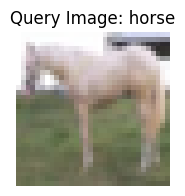

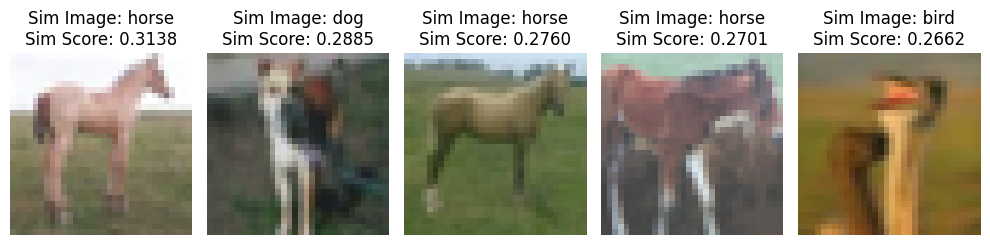

In [6]:
# Randomly select a test image index for retrieval from the test images
test_image_index = np.random.randint(test_images.shape[0])
print(test_image_index)

# Load the test image and its features
test_image = test_images[test_image_index]
test_feature = test_features_flat[test_image_index].reshape(1, -1)

# Find the most similar images to the test image
distances, indices = nn_model.kneighbors(test_feature)

# Get the class labels for train and test images
train_labels = train_labels.flatten()
test_label = test_labels[test_image_index][0]

# Get the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the test image
plt.figure(figsize=(2, 2))
plt.imshow(test_image)
plt.title('Query Image: {}'.format(class_names[test_labels[test_image_index][0]]))
plt.axis('off')
plt.show()

# Display the retrieved images
plt.figure(figsize=(10, 4))
for i in range(n_neighbors):
    train_image_index = indices[0][i]
    train_image = train_images[train_image_index]
    train_label = train_labels[train_image_index]
    similarity_score = 1.0 / distances[0][i]  # Calculate similarity score
    
    plt.subplot(1, n_neighbors, i + 1)
    plt.imshow(train_image)
    plt.title('Sim Image: {}\nSim Score: {:.4f}'.format(class_names[train_label], similarity_score))
    plt.axis('off')
plt.tight_layout()
plt.show()

### VGG images

9154: bird
5568: horse
9876: airplane
1561: dog
8101: ship